In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [17]:
df = pd.read_csv('eng_pp_9523_eda.csv')

# #GROUPING EACH PROPERTY TYPE INTO DATAFRAME COLUMNS

In [21]:
# Define property type meanings
property_types = {
    'T': 'Terraced',
    'S': 'Semi-detached',
    'D': 'Detached',
    'F': 'Flat',
    'O': 'Others'
}

In [22]:
# Create new columns for each property type with 0/1 values
for prop_type, meaning in property_types.items():
    df[meaning] = df['Property_Type'].apply(lambda x: 1 if x == prop_type else 0)

In [26]:
# Drop the original 'property_type' column (optional)
df.drop('Property_Type', axis=1, inplace=True)

In [27]:
# Print the modified DataFrame
print(df)

          Year     Month   price Old/New            Street         Locality  \
0         1995  February   44500       N       HOWICK PARK       SUNDERLAND   
1         1995   January   56500       N  BRICK KILN CLOSE       COGGESHALL   
2         1995      July   58000       N  RAINSBROOK DRIVE          SHIRLEY   
3         1995      June   51000       N        MERRY HILL    BRIERLEY HILL   
4         1995     March   17000       N     DENMAN STREET        ROTHERHAM   
...        ...       ...     ...     ...               ...              ...   
22653981  2023   January  158000       N  LONGFELLOW DRIVE              NaN   
22653982  2023       May  172000       N   EARLSWOOD DRIVE              NaN   
22653983  2023     April  272000       N  CASTLETON AVENUE           ARNOLD   
22653984  2023      June  260000       N      COOPER CLOSE  CROPWELL BISHOP   
22653985  2023       May  175000       N   MOORLAND AVENUE     WALKERINGHAM   

              Town/City    District           Count

In [28]:
df

,Year,Month,price,Old/New,Street,Locality,Town/City,District,County,Terraced,Semi-detached,Detached,Flat,Others
0,1995,February,44500,N,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,1,0,0,0,0
1,1995,January,56500,N,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,1,0,0,0,0
2,1995,July,58000,N,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,1,0,0,0,0
3,1995,June,51000,N,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,0,1,0,0,0
4,1995,March,17000,N,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22653981,2023,January,158000,N,LONGFELLOW DRIVE,NaN,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,0,1,0,0,0
22653982,2023,May,172000,N,EARLSWOOD DRIVE,NaN,MANSFIELD,MANSFIELD,NOTTINGHAMSHIRE,0,1,0,0,0
22653983,2023,April,272000,N,CASTLETON AVENUE,ARNOLD,NOTTINGHAM,GEDLING,NOTTINGHAMSHIRE,0,0,1,0,0
22653984,2023,June,260000,N,COOPER CLOSE,CROPWELL BISHOP,NOTTINGHAM,RUSHCLIFFE,NOTTINGHAMSHIRE,0,0,1,0,0


In [29]:
desired_order = ['Year', 'Month', 'price','Old/New', 'Detached', 'Semi-detached', 'Terraced', 'Flat', 'Others', 'Street', 'Locality', 'Town/City', 'District', 'County']

In [30]:
df = df[desired_order]

In [31]:
df

,Year,Month,price,Old/New,Detached,Semi-detached,Terraced,Flat,Others,Street,Locality,Town/City,District,County
0,1995,February,44500,N,0,0,1,0,0,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR
1,1995,January,56500,N,0,0,1,0,0,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX
2,1995,July,58000,N,0,0,1,0,0,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS
3,1995,June,51000,N,0,1,0,0,0,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS
4,1995,March,17000,N,0,0,1,0,0,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22653981,2023,January,158000,N,0,1,0,0,0,LONGFELLOW DRIVE,NaN,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE
22653982,2023,May,172000,N,0,1,0,0,0,EARLSWOOD DRIVE,NaN,MANSFIELD,MANSFIELD,NOTTINGHAMSHIRE
22653983,2023,April,272000,N,1,0,0,0,0,CASTLETON AVENUE,ARNOLD,NOTTINGHAM,GEDLING,NOTTINGHAMSHIRE
22653984,2023,June,260000,N,1,0,0,0,0,COOPER CLOSE,CROPWELL BISHOP,NOTTINGHAM,RUSHCLIFFE,NOTTINGHAMSHIRE


In [32]:
df.to_csv('eng_pp_9523_eda_pivoted.csv')

<h2>VISUALISATION</h2>

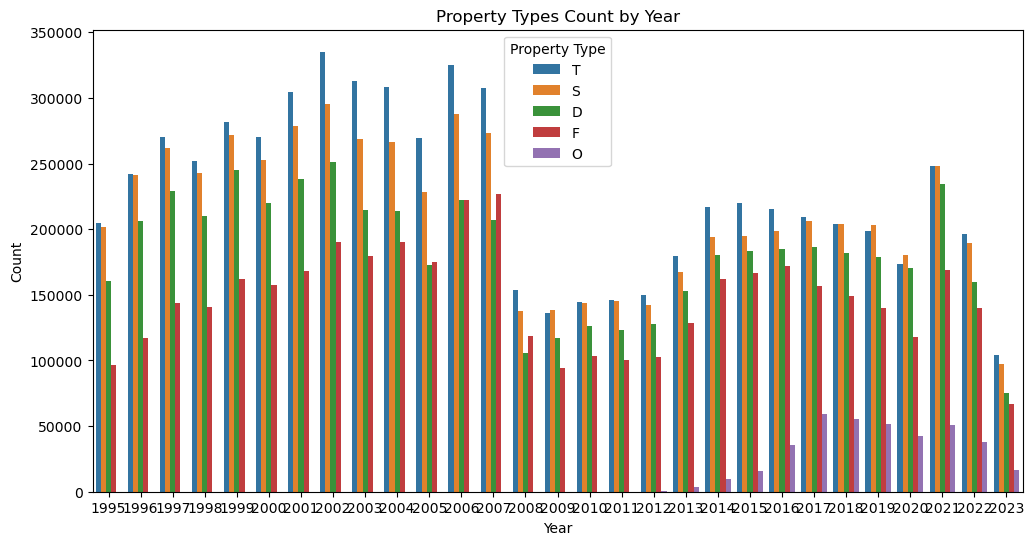

In [5]:
# Create a count plot
plt.figure(figsize=(12, 6))
plot = sns.countplot(x='Year', hue='Property_Type', data=df)

# Add labels and title
plt.title('Property Types Count by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the legend
plt.legend(title='Property Type')

# Show the plot
plt.show()

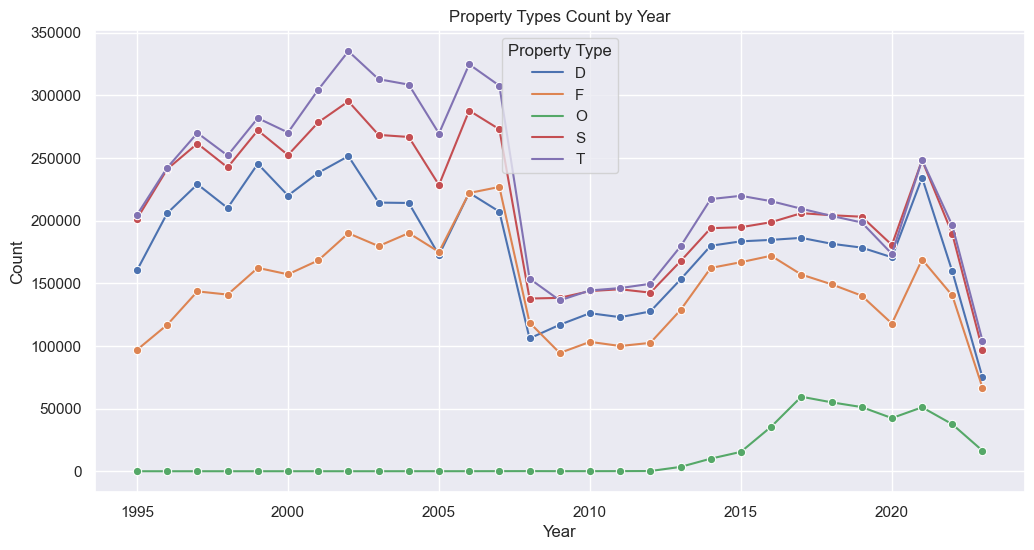

In [6]:

# Group the data by year and property type and calculate the count
grouped_data = df.groupby(['Year', 'Property_Type']).size().reset_index(name='Count')

# Set the style of seaborn
sns.set(style="darkgrid")

# Create a line plot
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='Year', y='Count', hue='Property_Type', data=grouped_data, marker='o')

# Add labels and title
plt.title('Property Types Count by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the legend
plt.legend(title='Property Type')

# Show the plot
plt.show()

In [7]:
# Step 3: Data Preprocessing
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
df.set_index('Date', inplace=True)
df.drop(['Year', 'Month'], axis=1, inplace=True)

In [8]:
df.head()

,Property_Type,price,Old/New,Street,Locality,Town/City,District,County
Date,,,,,,,,
1995-02-01,T,44500,N,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR
1995-01-01,T,56500,N,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX
1995-07-01,T,58000,N,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS
1995-06-01,S,51000,N,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS
1995-03-01,T,17000,N,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE


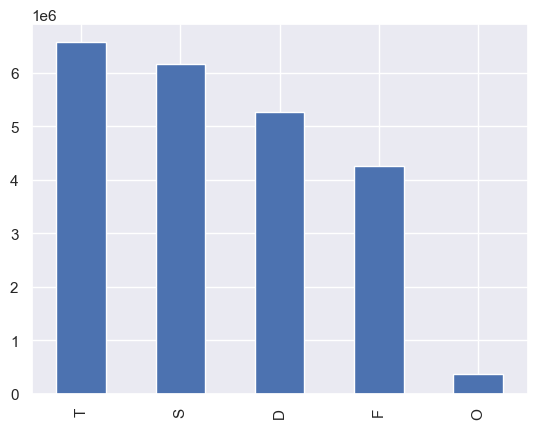

In [9]:
# Step 4: Time Series Visualization
df['Property_Type'].value_counts().plot(kind='bar')
plt.show()

In [10]:
# Step 5: Time Series Decomposition for Each Property Type
property_types = df['Property_Type'].unique()

for property_type in property_types:
# Filter data for the specific property type
    property_df = df[df['Property_Type'] == property_type]['Property_Type']

In [11]:
# Convert the property time series to numeric 
property_df_numeric = pd.to_numeric(property_df, errors='coerce').dropna()
#property_df_numeric = property_df_numeric.interpolate(method='linear')

In [12]:
 # Check if there are still missing values after interpolation
#if property_df_numeric.isnull().any():
    # Handle remaining missing values using other methods if needed
   # property_df_numeric = property_df_numeric.fillna(method='ffill')  # Forward fill for remaining missing values


In [13]:
# Decompose the time series for each property type
decomposed = df.groupby('Property_Type').apply(lambda x: seasonal_decompose(x['Property_Type'], model='multiplicative', period=12))

# Plot the decomposed components
fig, axs = plt.subplots(5, 3, figsize=(20, 15))
for i, prop_type in enumerate(decomposed.index):
    axs[i // 3, i % 3].plot(decomposed.loc[prop_type]['observed'])
    axs[i // 3, i % 3].plot(decomposed.loc[prop_type]['trend'])
    axs[i // 3, i % 3].plot(decomposed.loc[prop_type]['seasonal'])
    axs[i // 3, i % 3].plot(decomposed.loc[prop_type]['residual'])
    axs[i // 3, i % 3].set_title(prop_type)
plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'D'